In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

In [2]:
%matplotlib inline

## Polarization

In [3]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY

from matplotlib import rcParams
rcParams['figure.figsize']=12,12
rcParams['figure.dpi']=300



number of processors: 8


In [4]:
length = 1000 * um
numdatos = 256
x0 = np.linspace(-length / 2, length / 2, numdatos)
y0 = np.linspace(-length / 2, length / 2, numdatos)

x0 = np.linspace(-750, 250, numdatos)
y0 = np.linspace(- 333, 666, numdatos)
wavelength = 0.6238 * um


In [5]:
EM0 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM0.gauss(
    A=1,
    r0=(0 * um, 0 * um),
    z=0 * um,
    w0=(500 * um, 500* um),
    kind='polarization',
    v=[1,1])

11 5


(-750, 750)

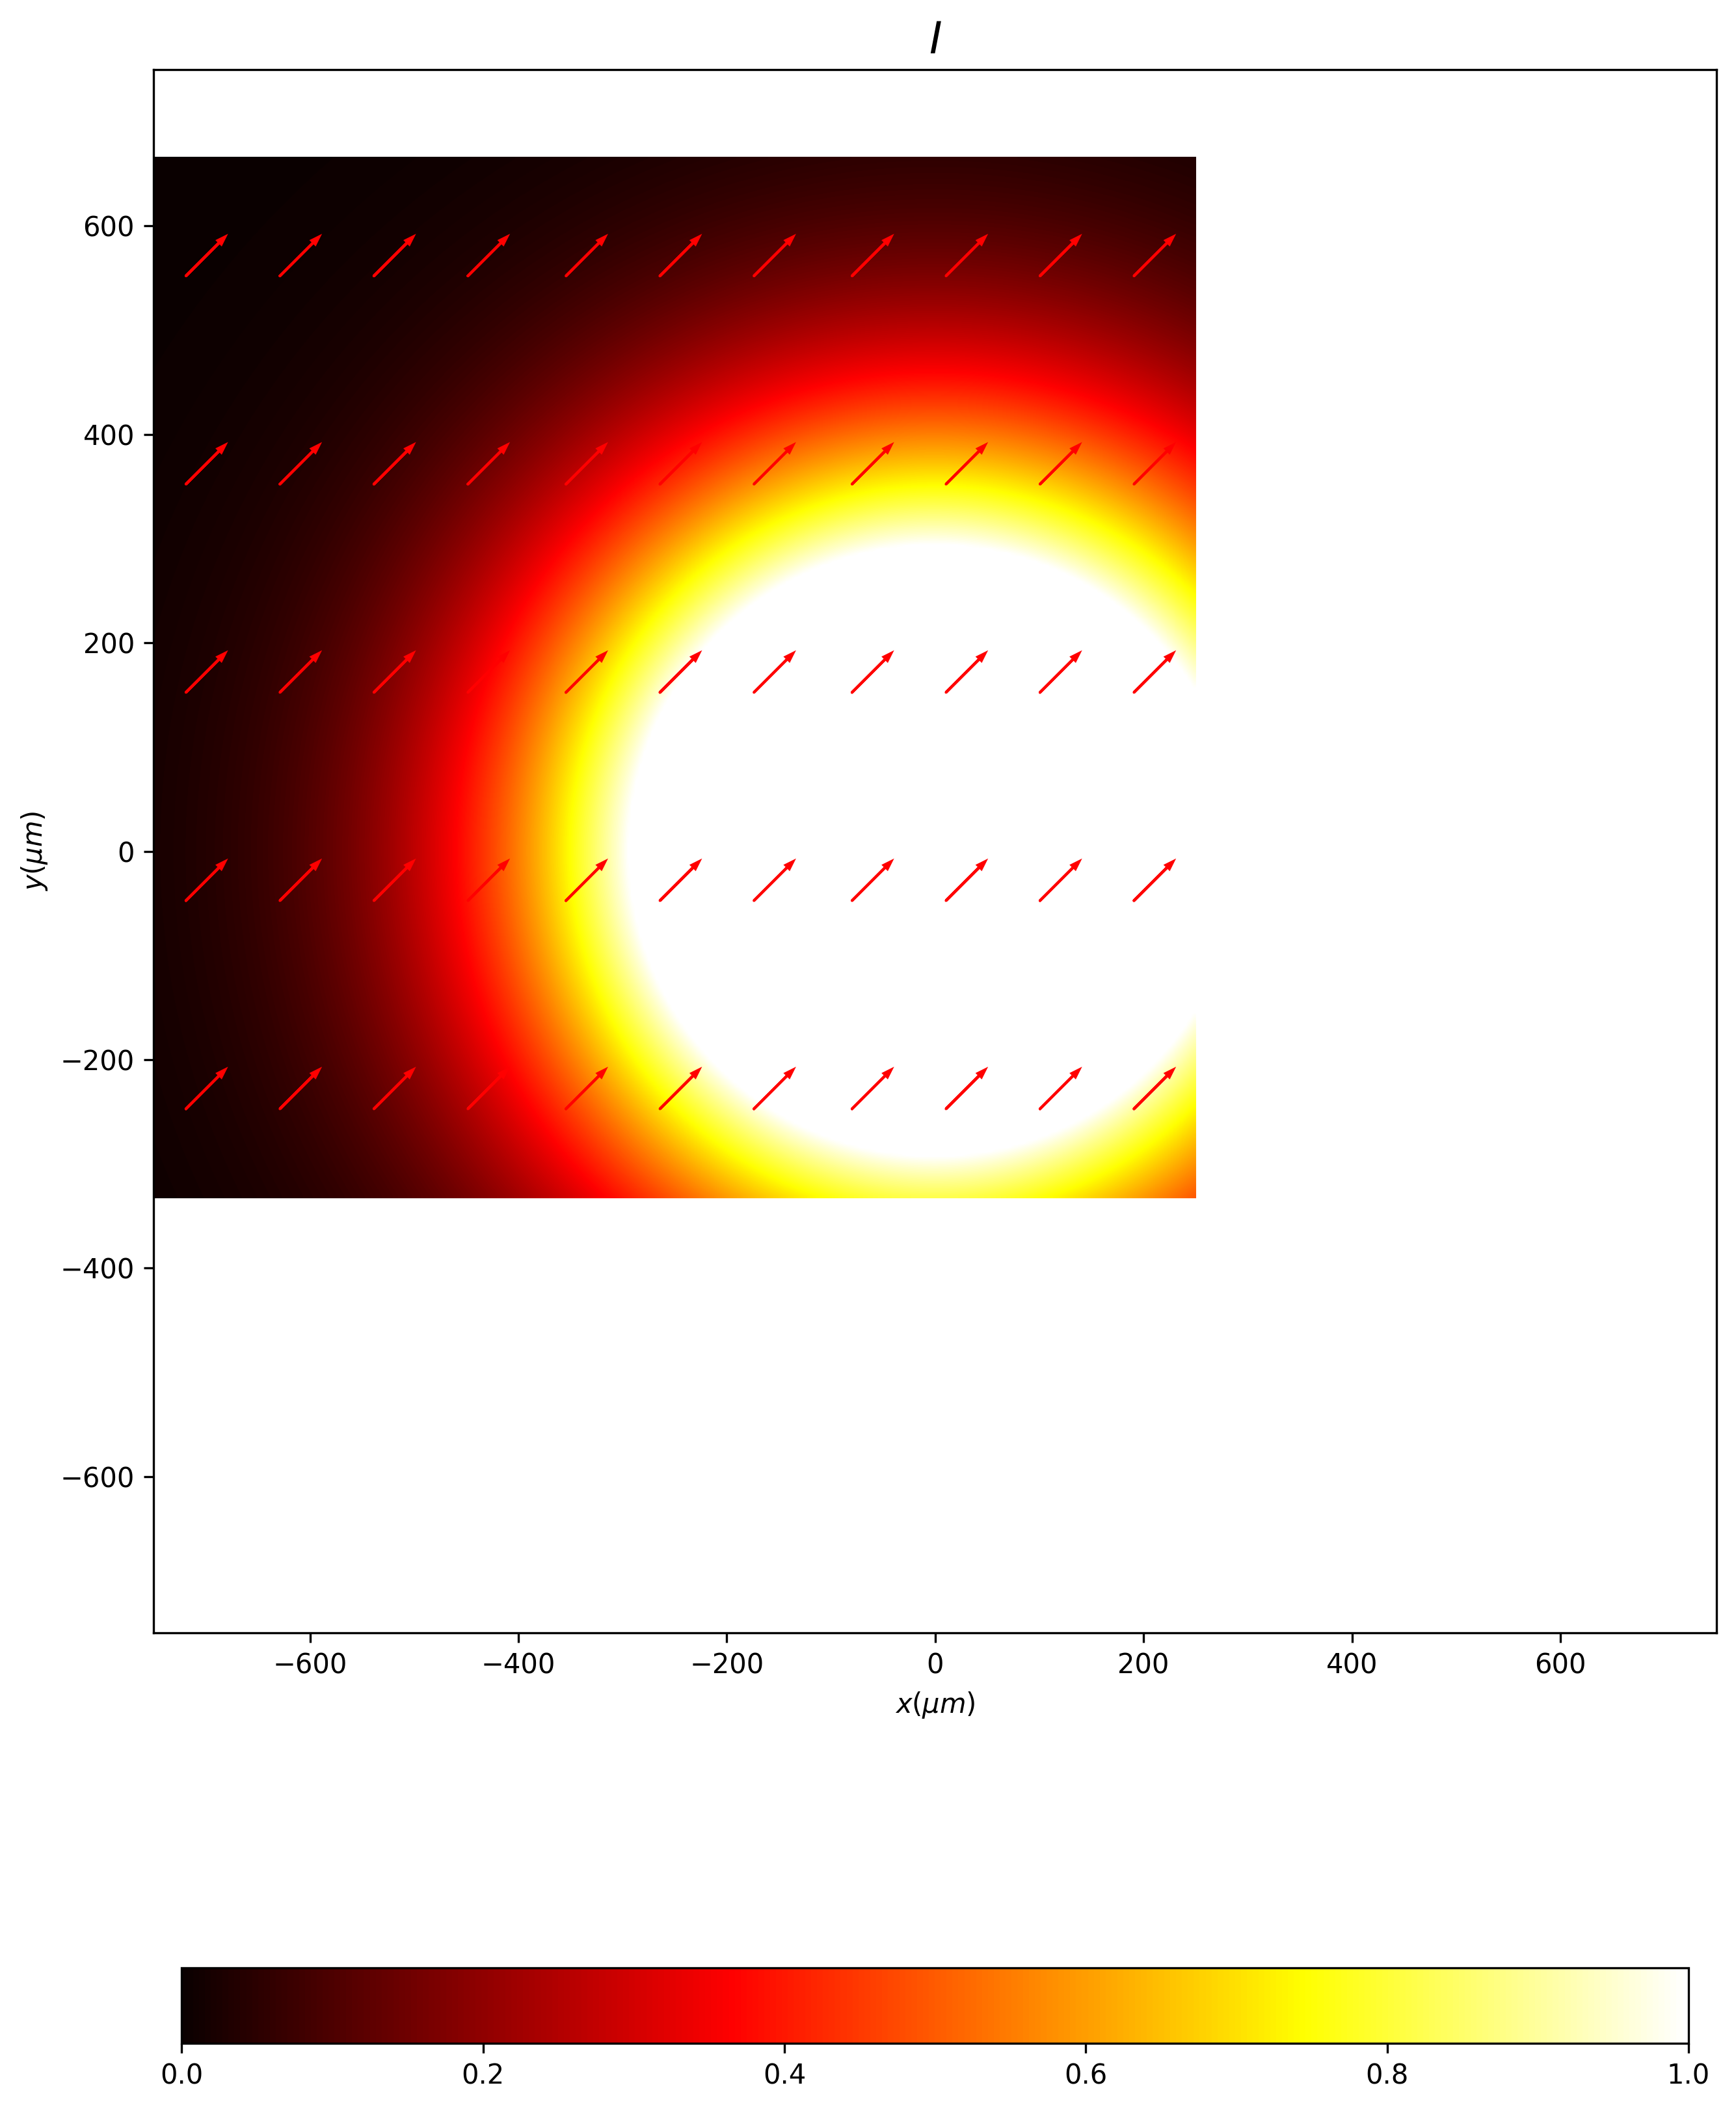

In [6]:
EM0.__draw_ellipses__(num_ellipses=(11,5), amplification=.5, color_line='r');
plt.xlim(-750,750)
plt.ylim(-750,750)

In [7]:
t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=(500 * um, 500 * um))

In [8]:
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.biprism_fresnel(
    r0=(0 * um, 0 * um), ancho=1000 * um, height=12* um, n=1.5)

u1 = t0 * t1

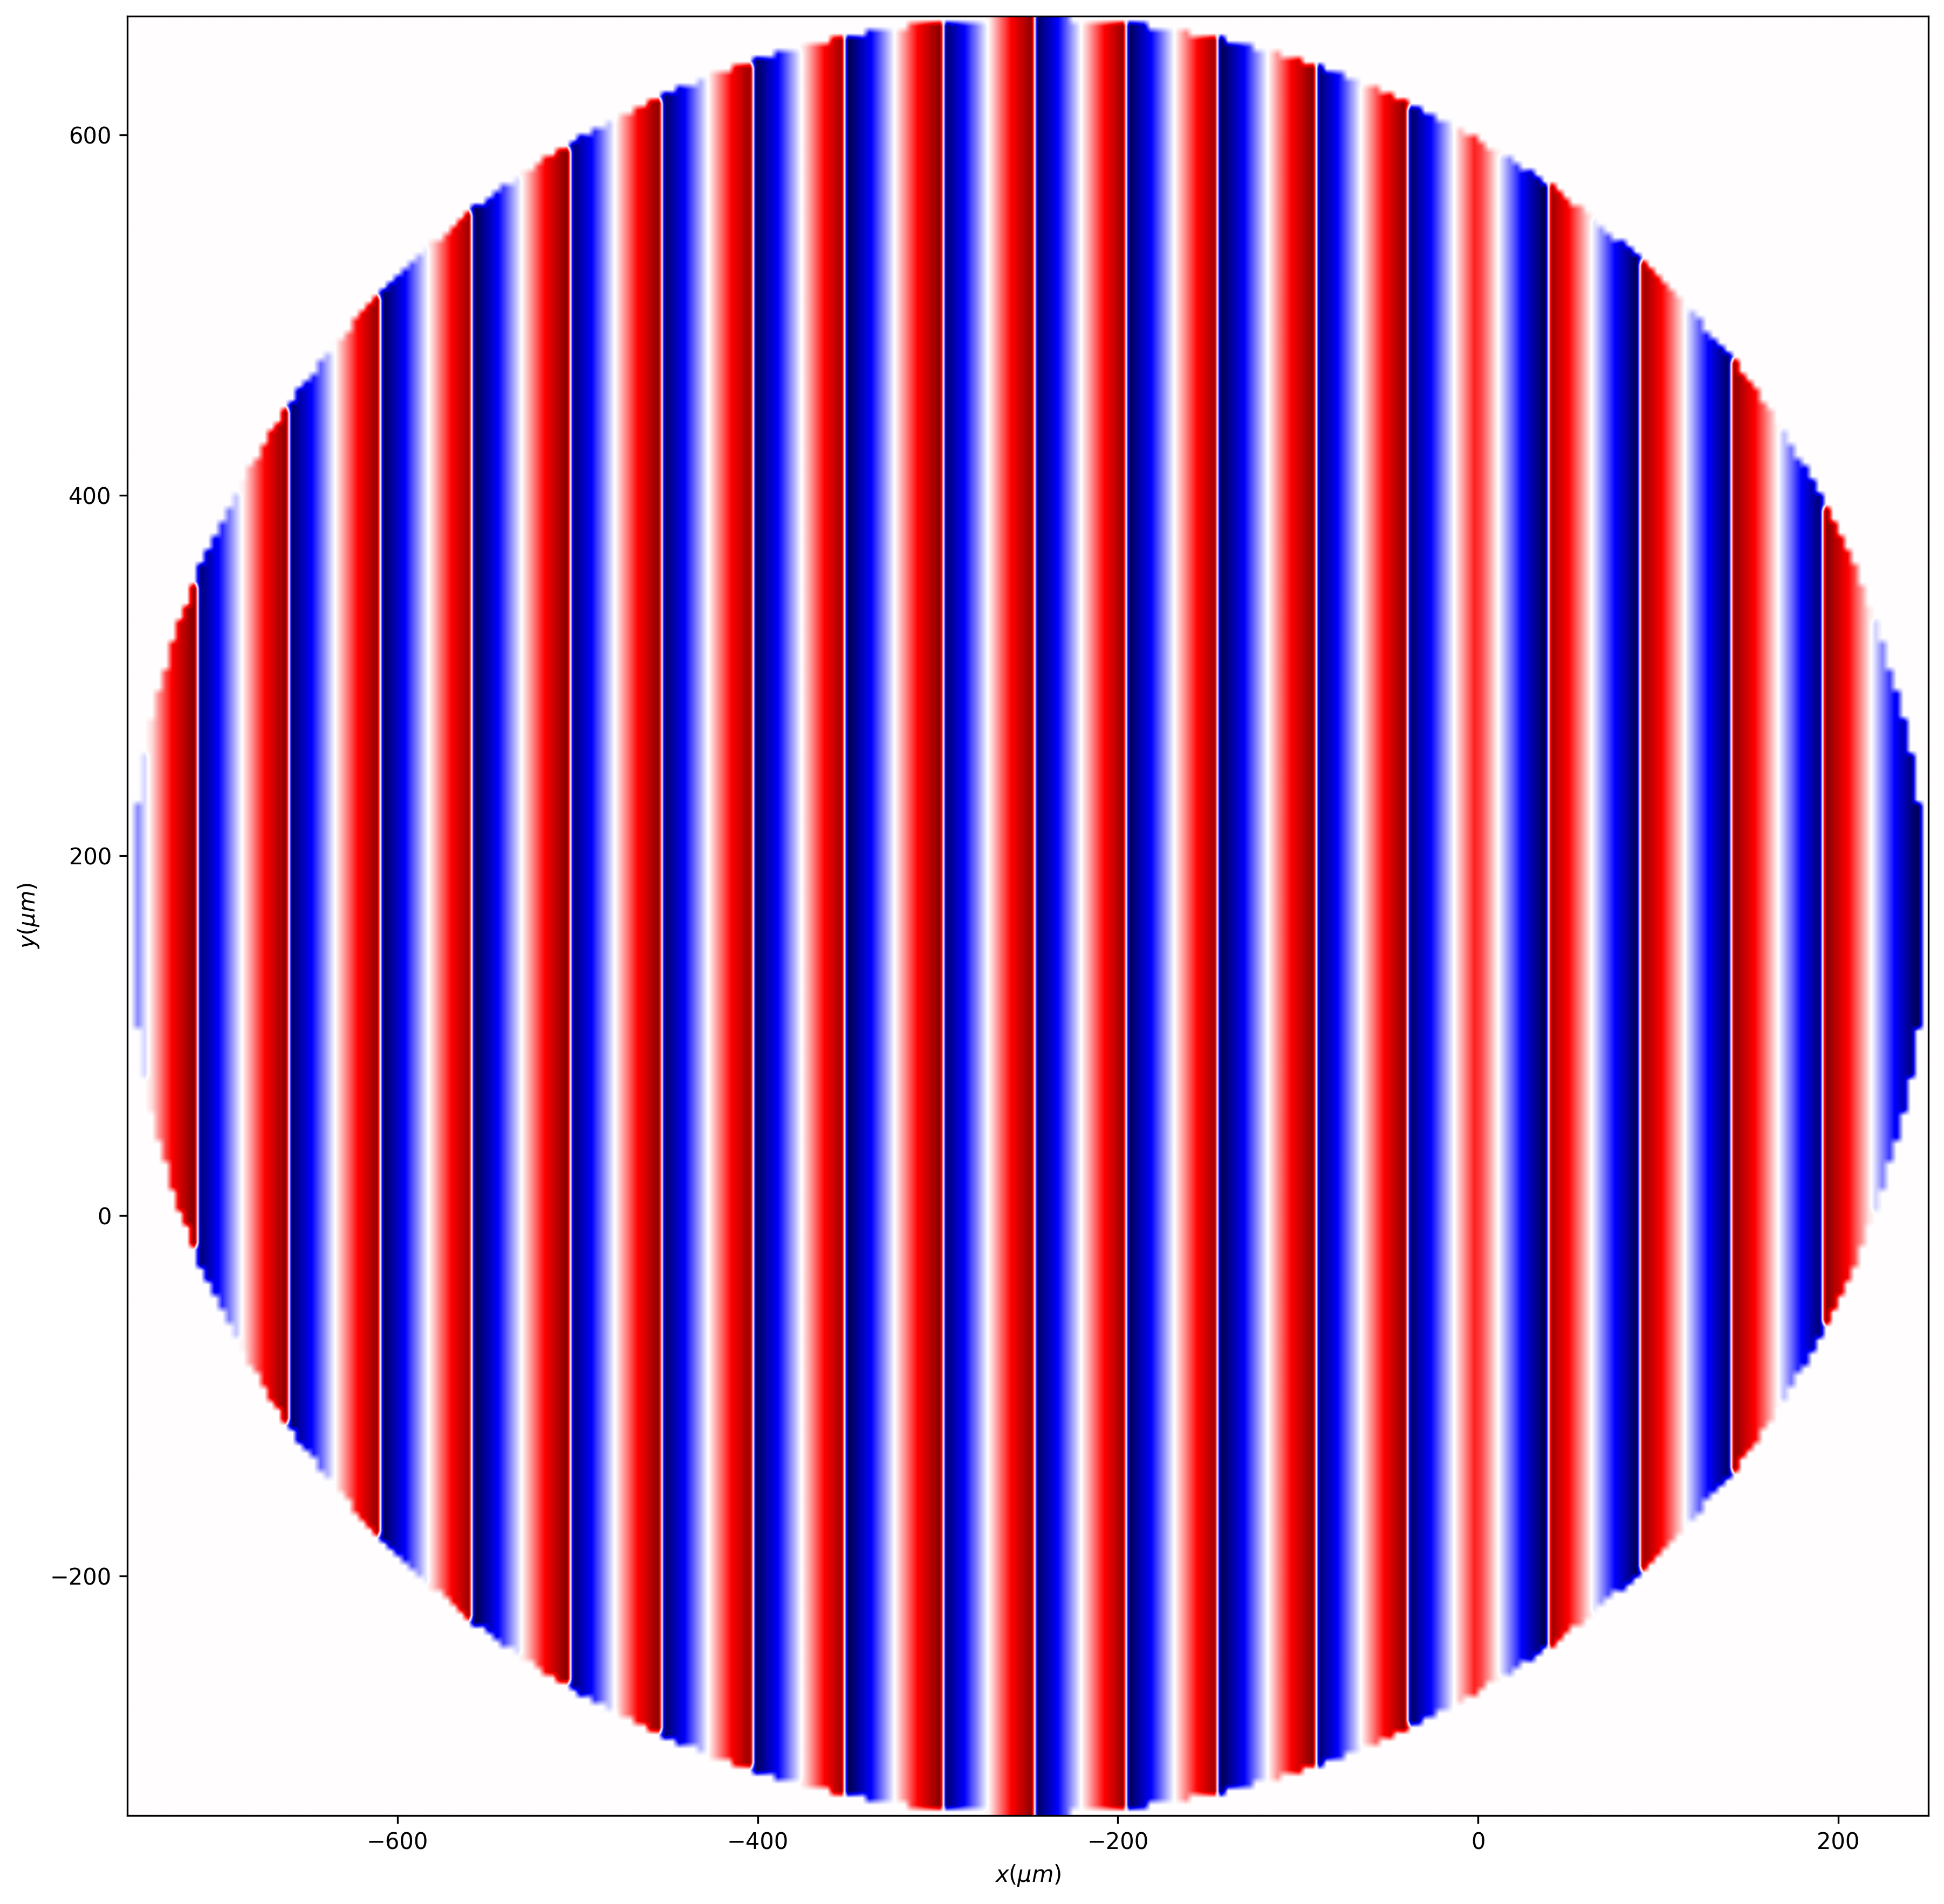

In [9]:
u1.draw(kind='phase');

In [10]:
EM1 = Vector_paraxial_mask_XY(x0, y0, wavelength)
EM1.equal_masks(u1)

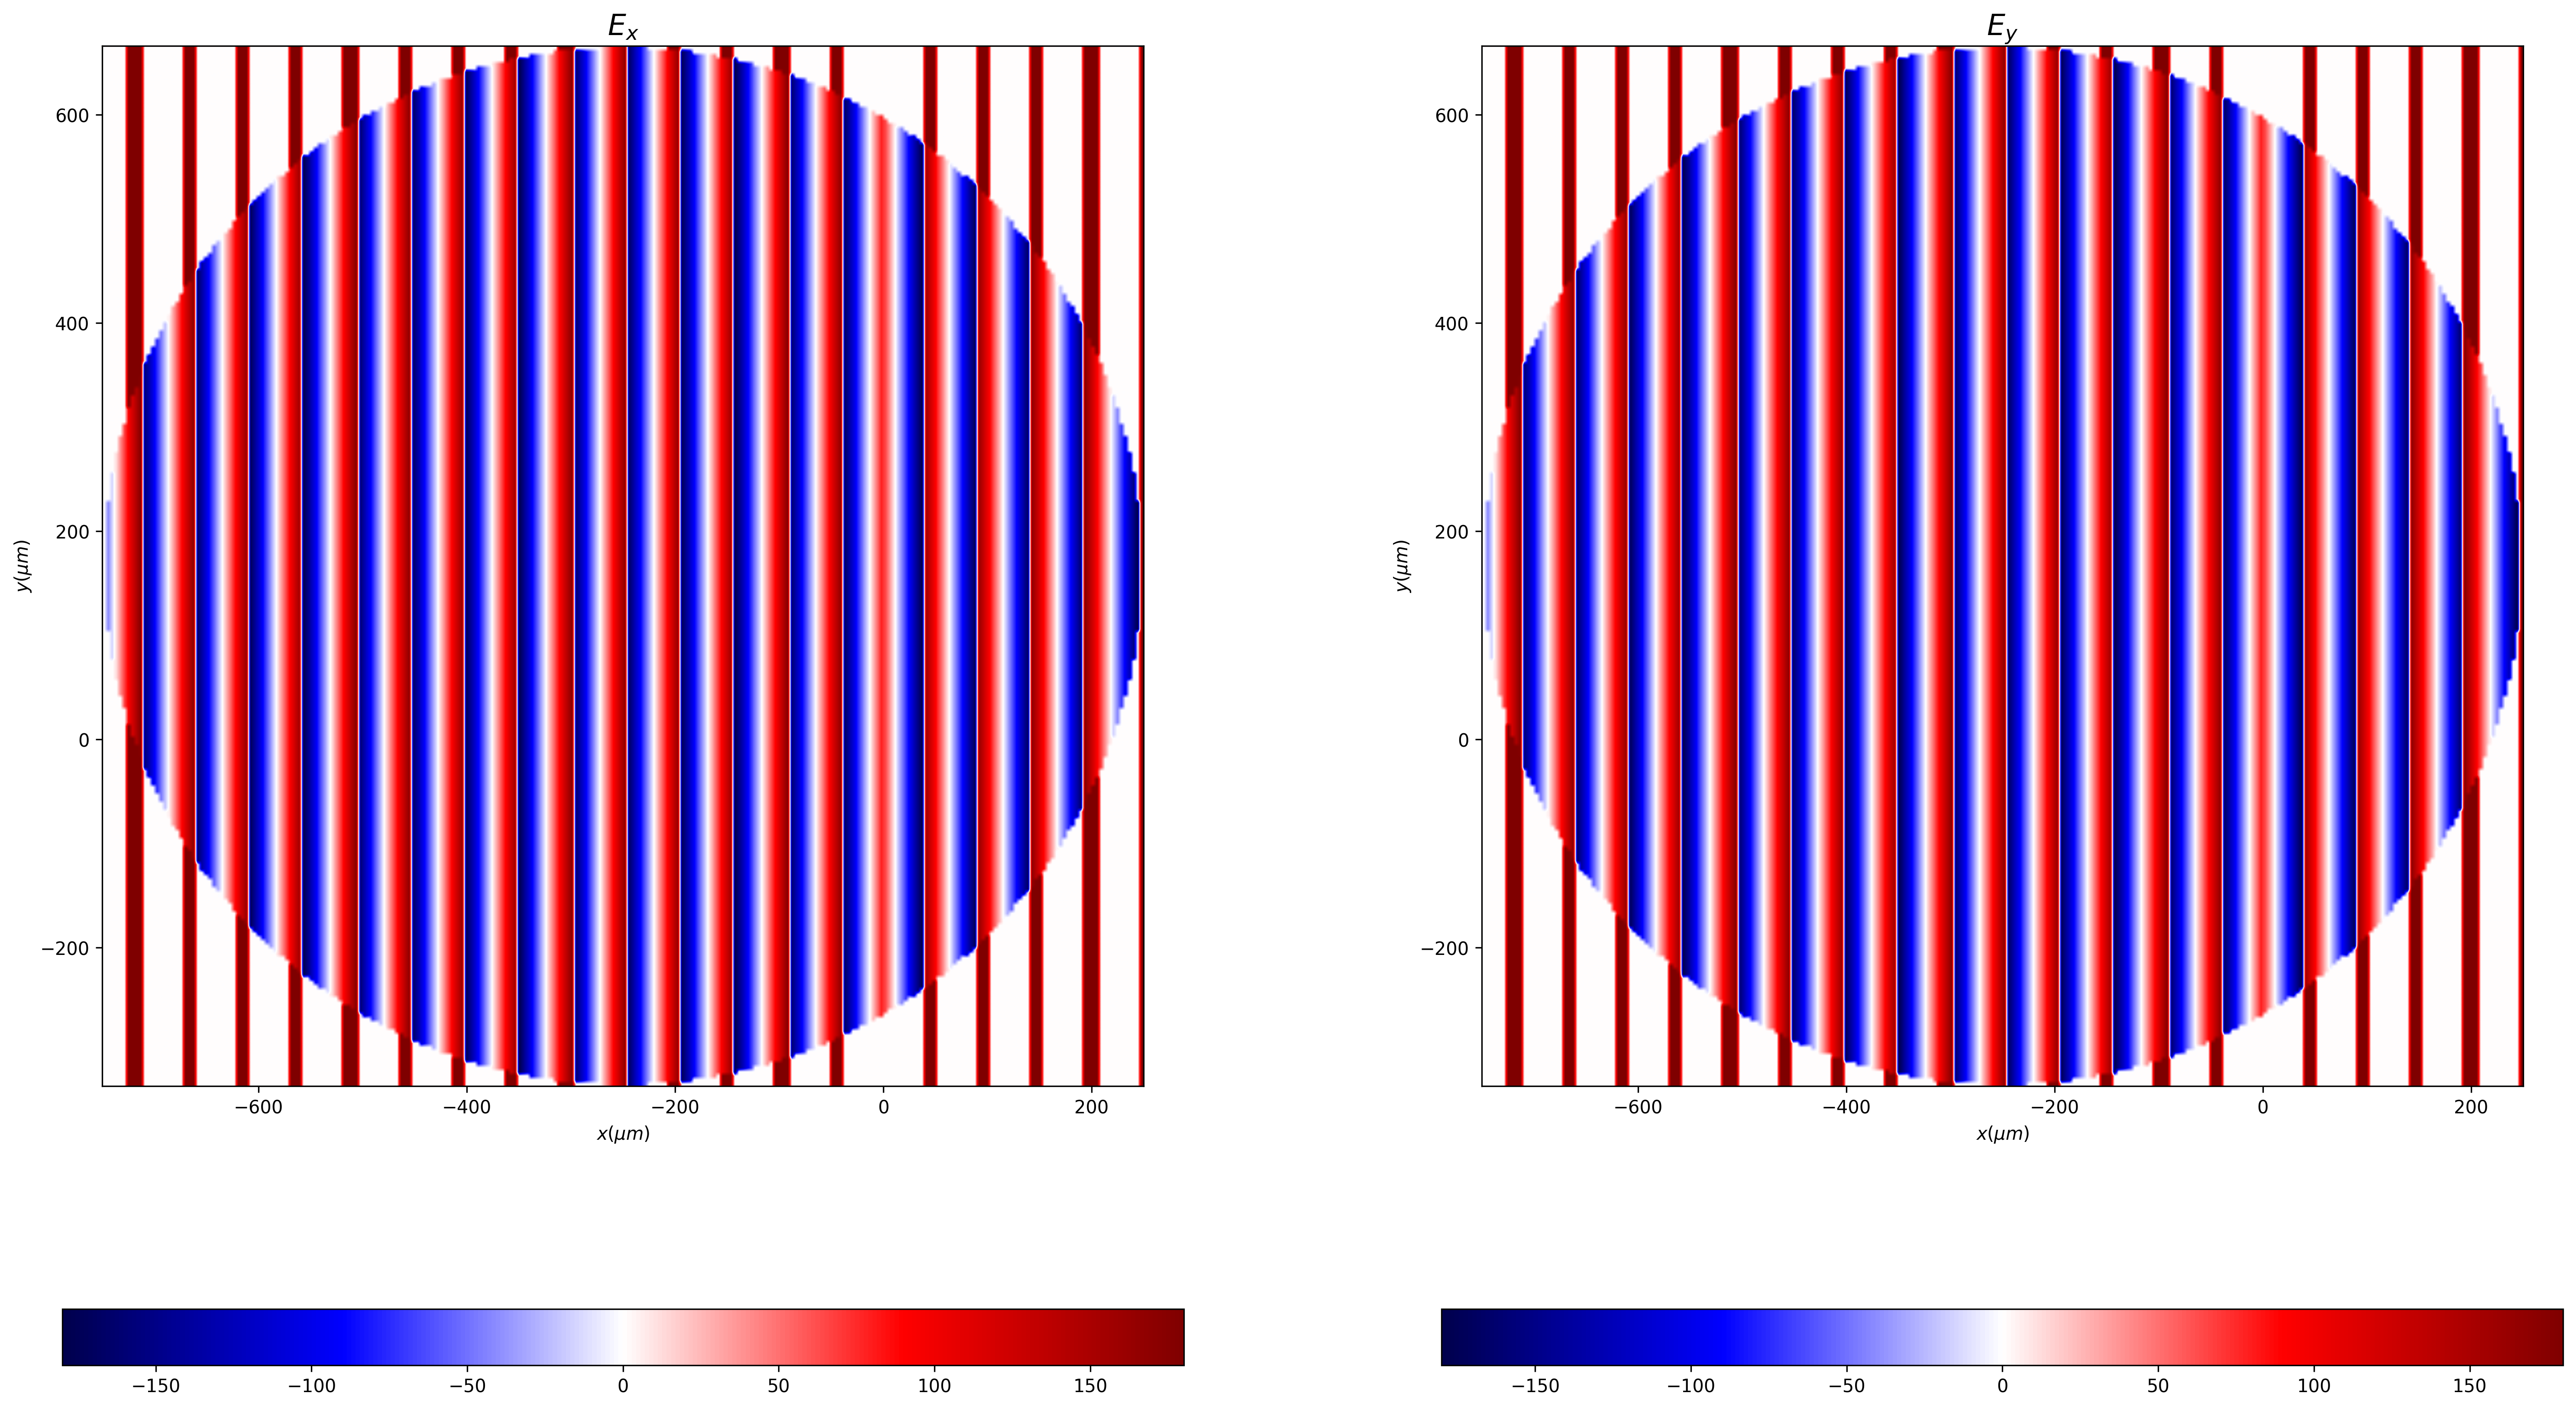

In [11]:
EM1.draw('phases');

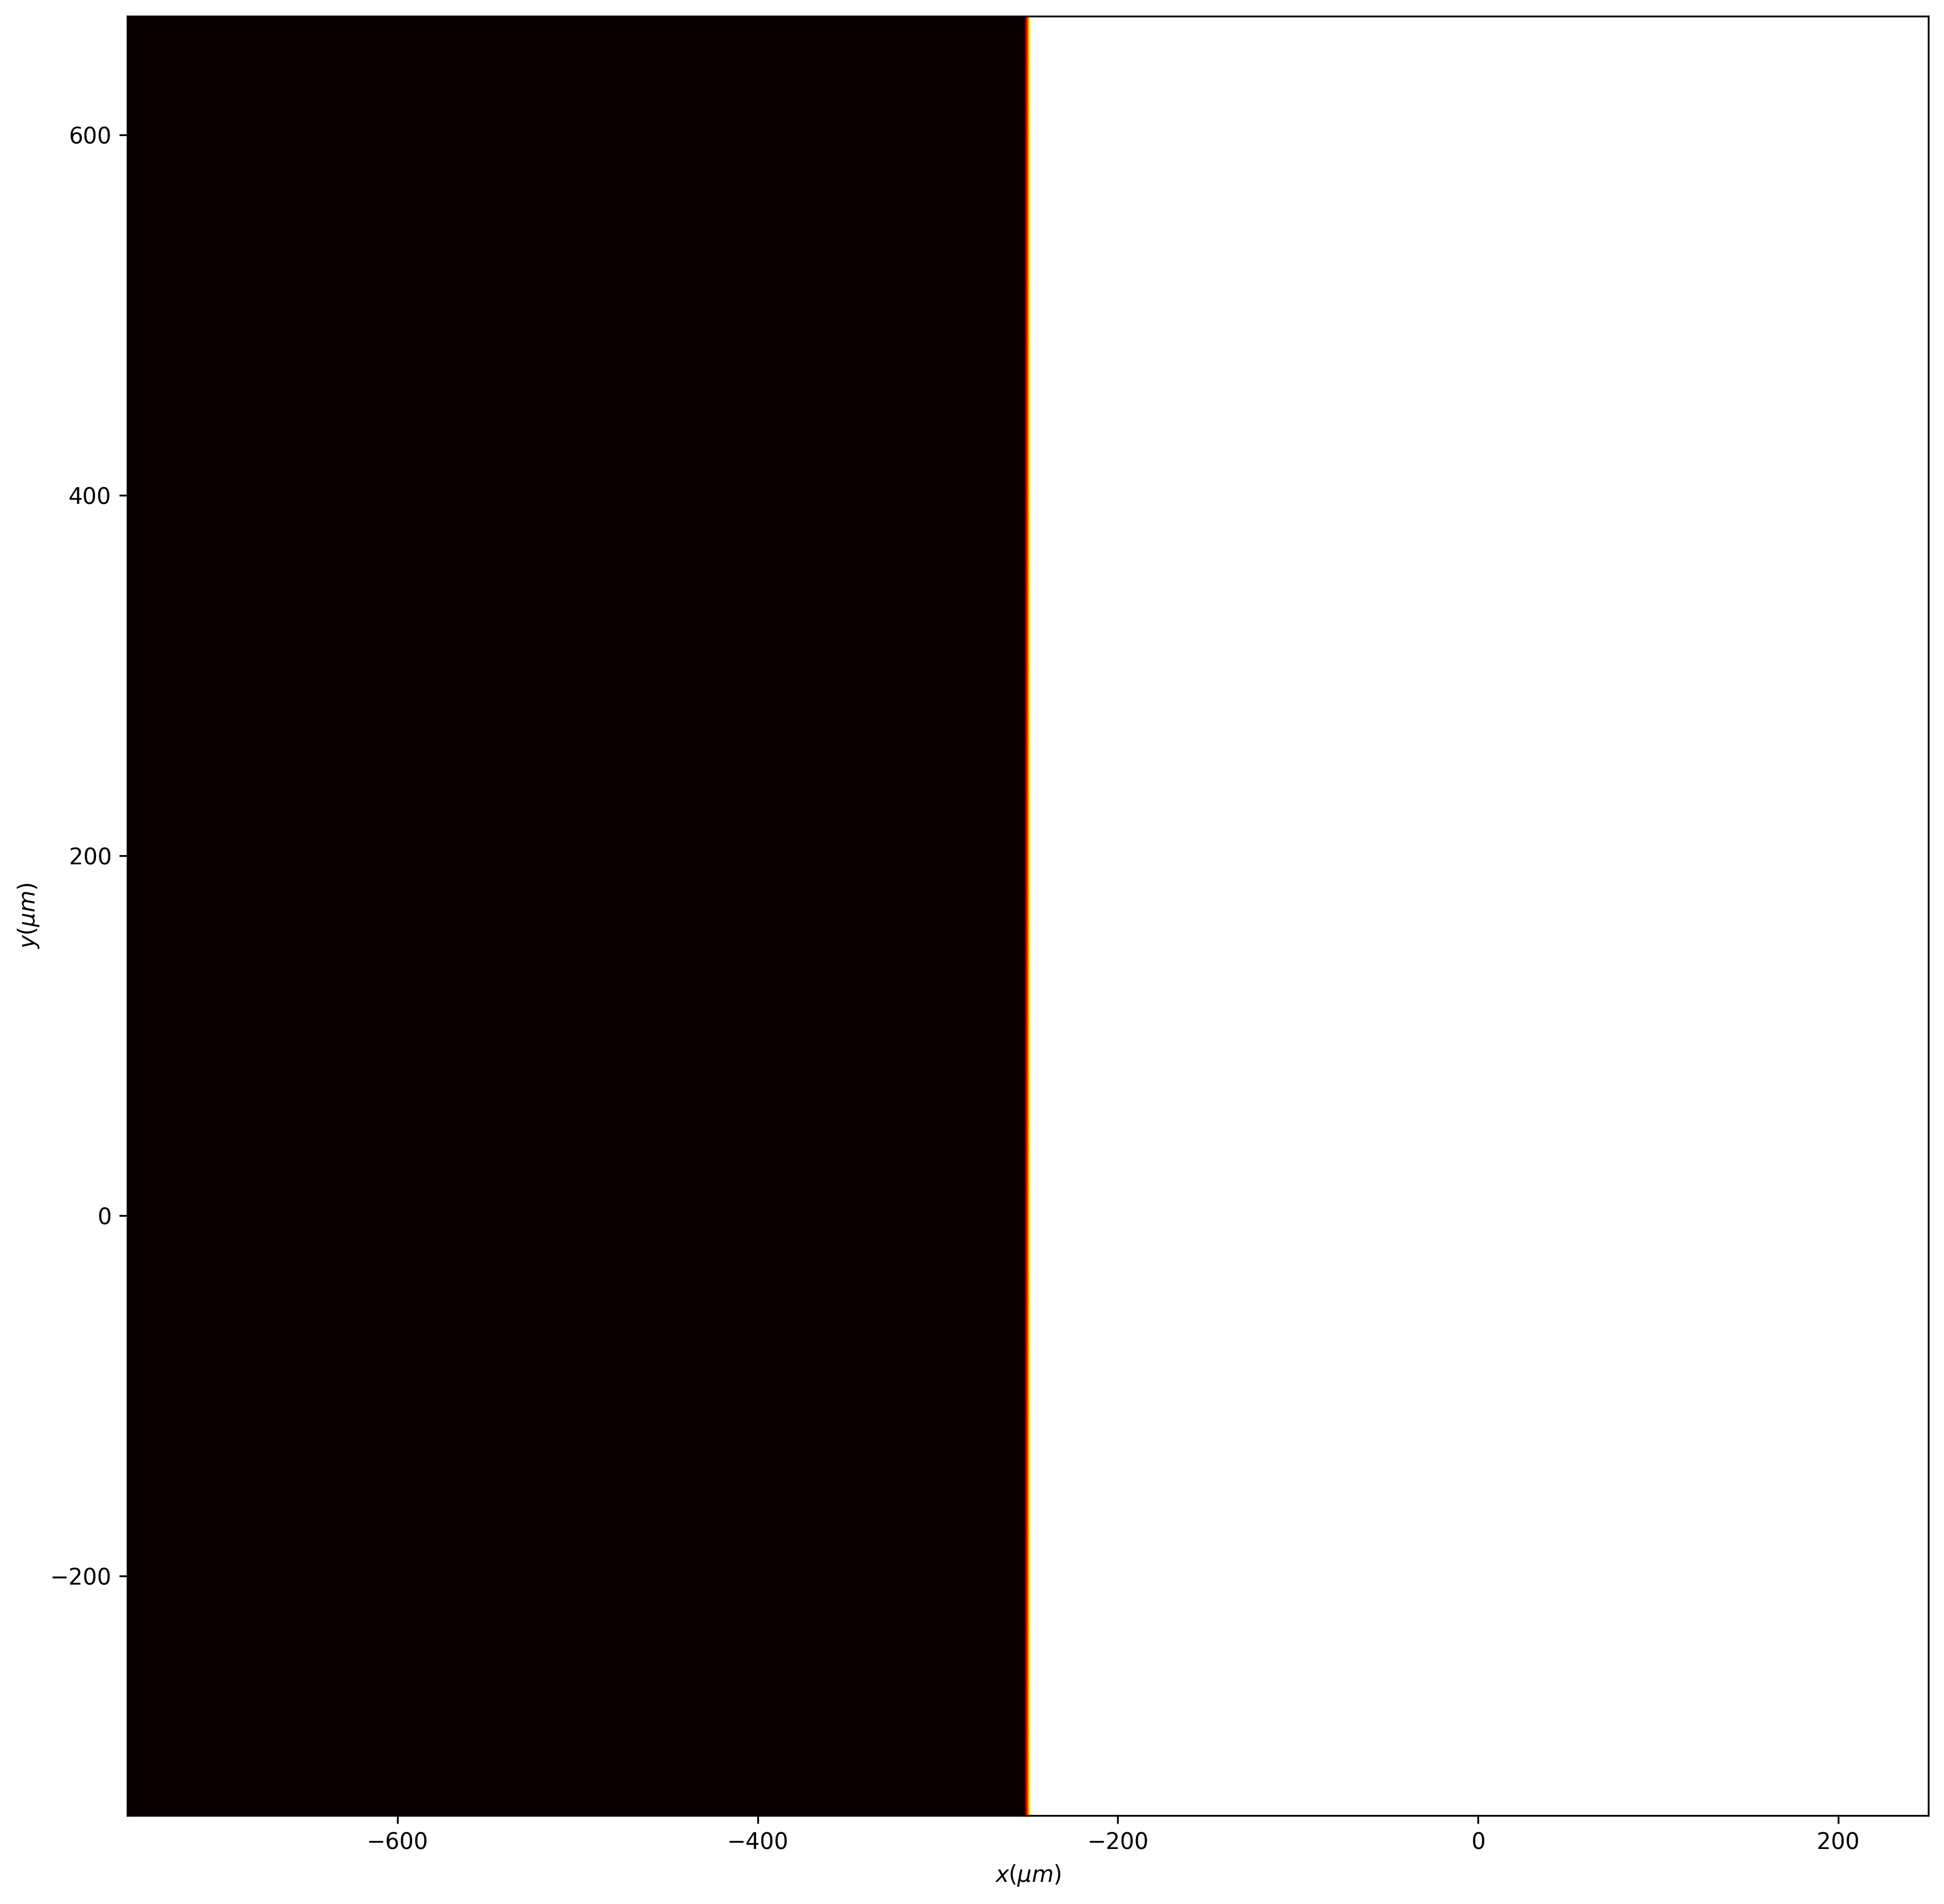

In [12]:
t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.two_levels(level1=0, level2=1)
t2.draw();

reduce_matrix_size: size ini = (256, 256), size_final = (256, 256)
11 21


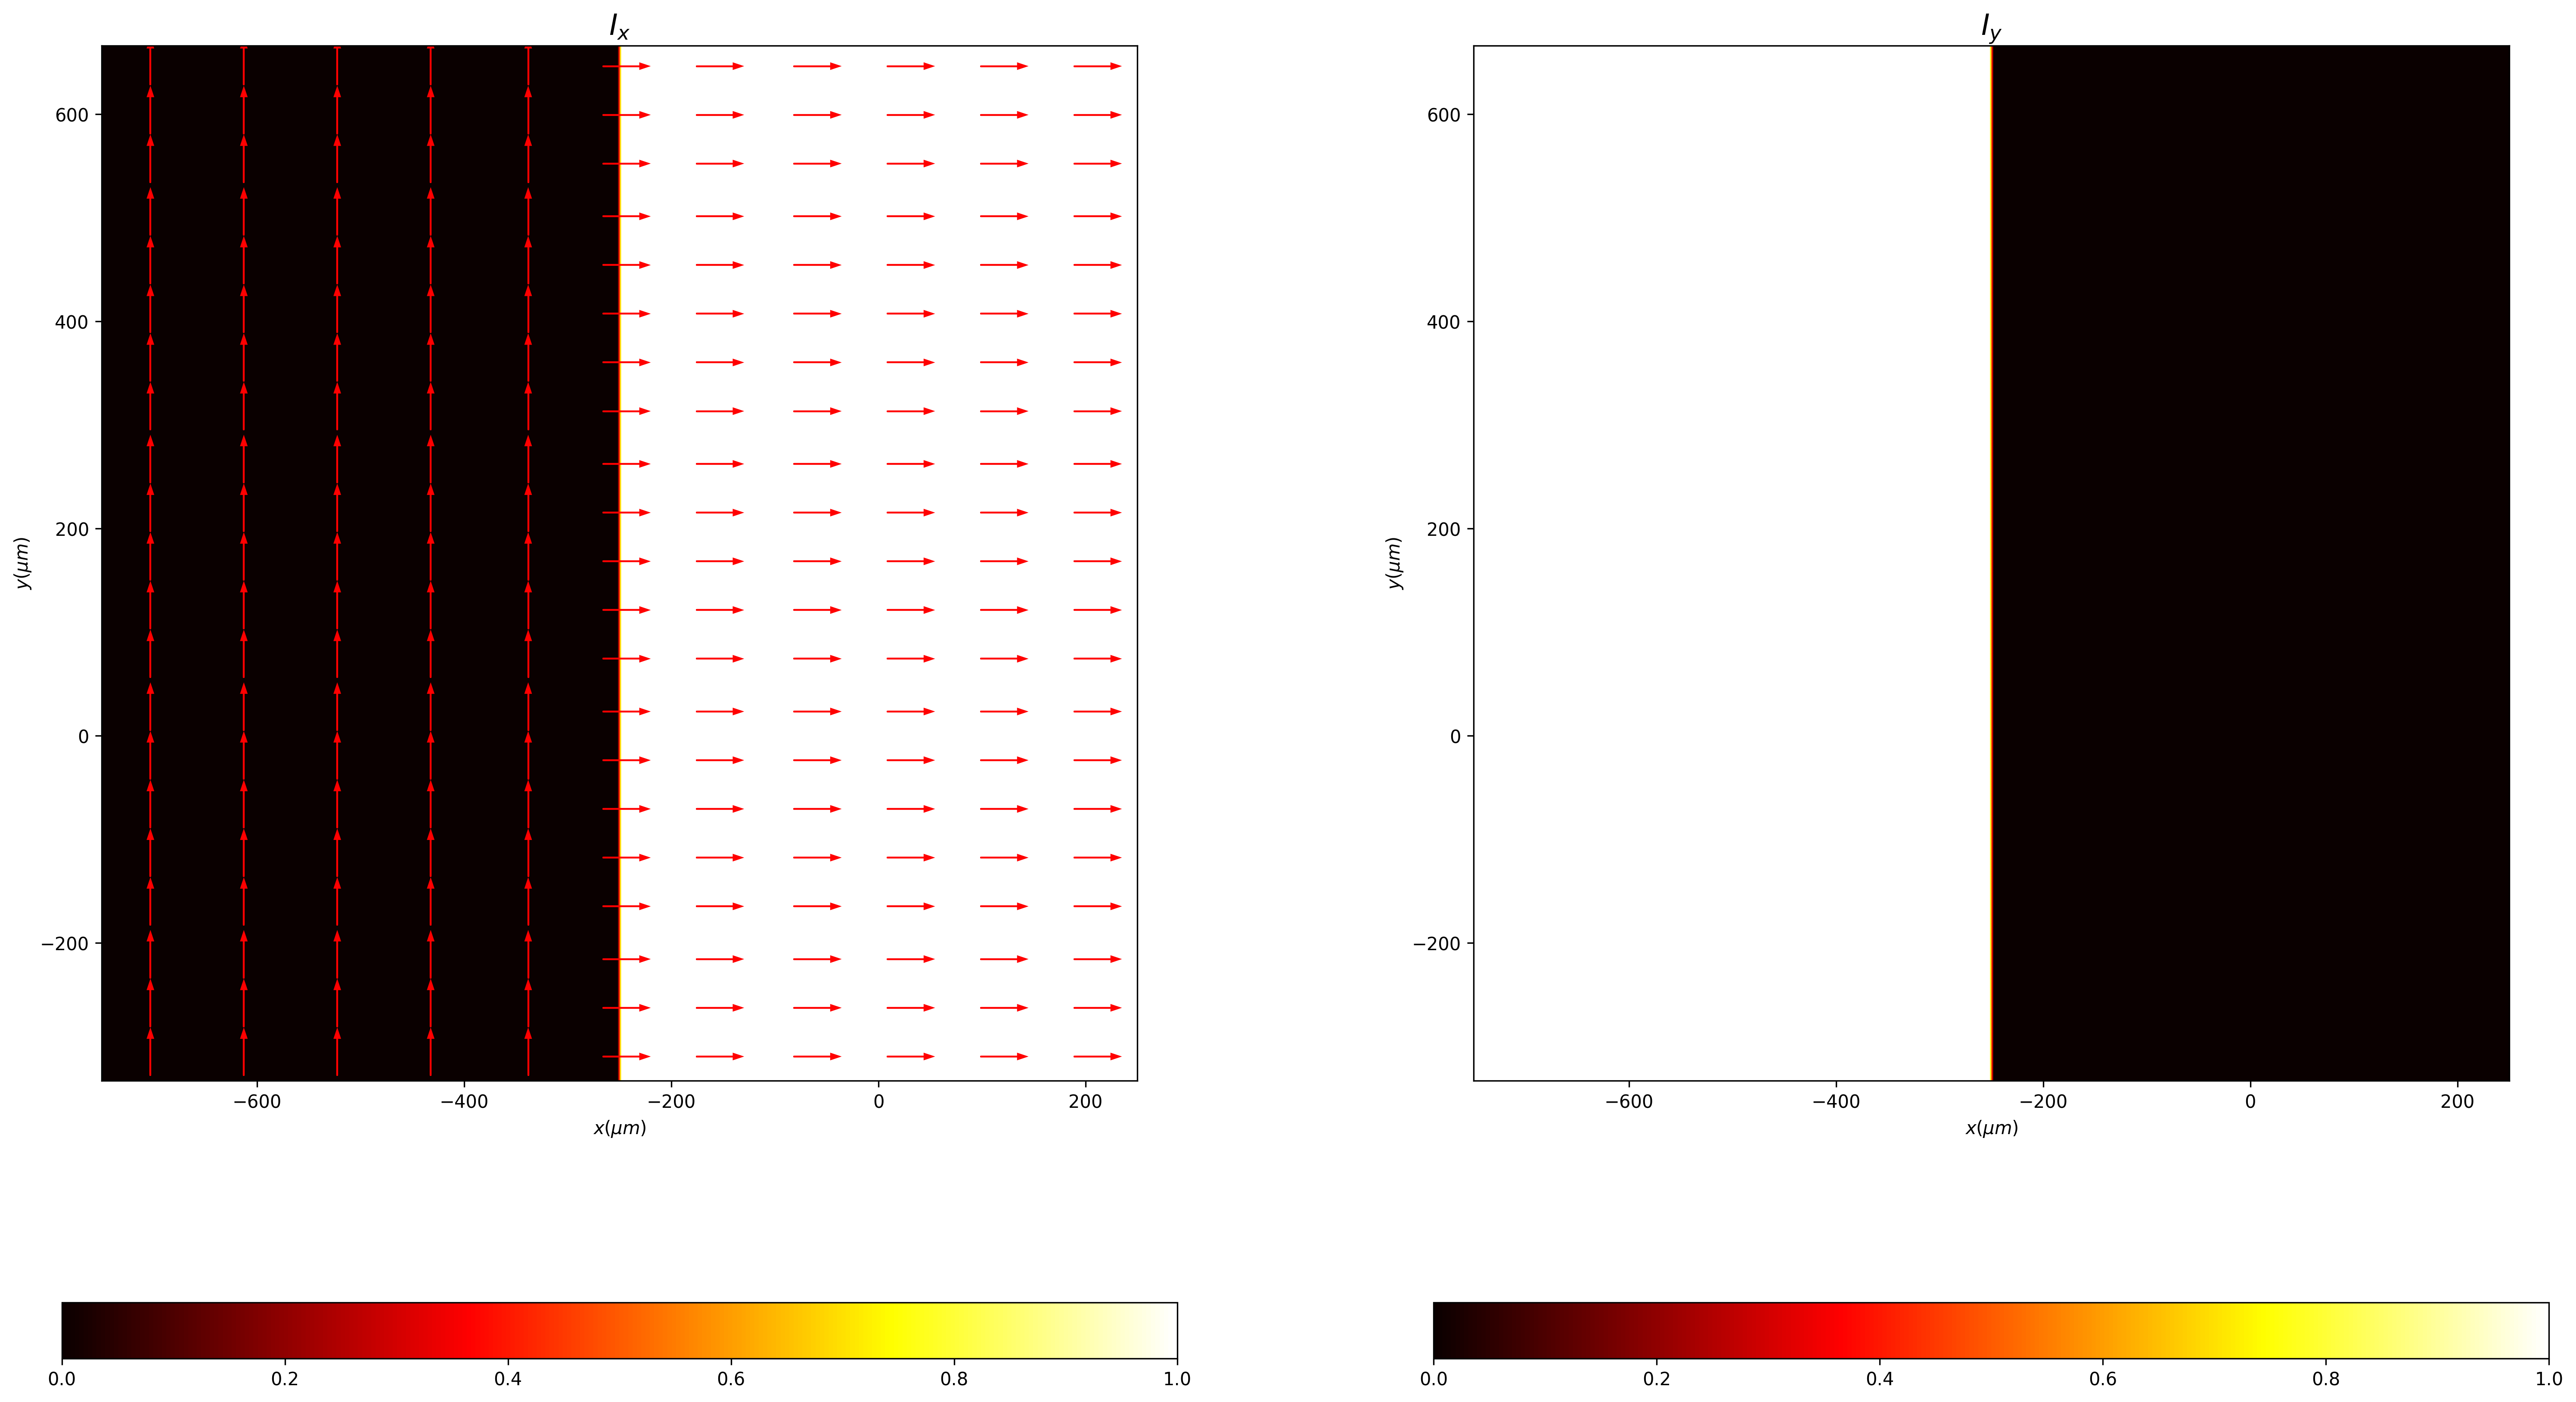

In [13]:
EM2 = Vector_paraxial_mask_XY(x0, y0, wavelength)
EM2.complementary_masks(t2, v1=(1,0), v2=(0,1))
h1,h2=EM2.draw('intensities')
EM2.__draw_ellipses__(num_ellipses=(11,21), color_line='r', amplification=0.75, ax=h1);

In [14]:
EM3=EM0*EM1*EM2

31 31


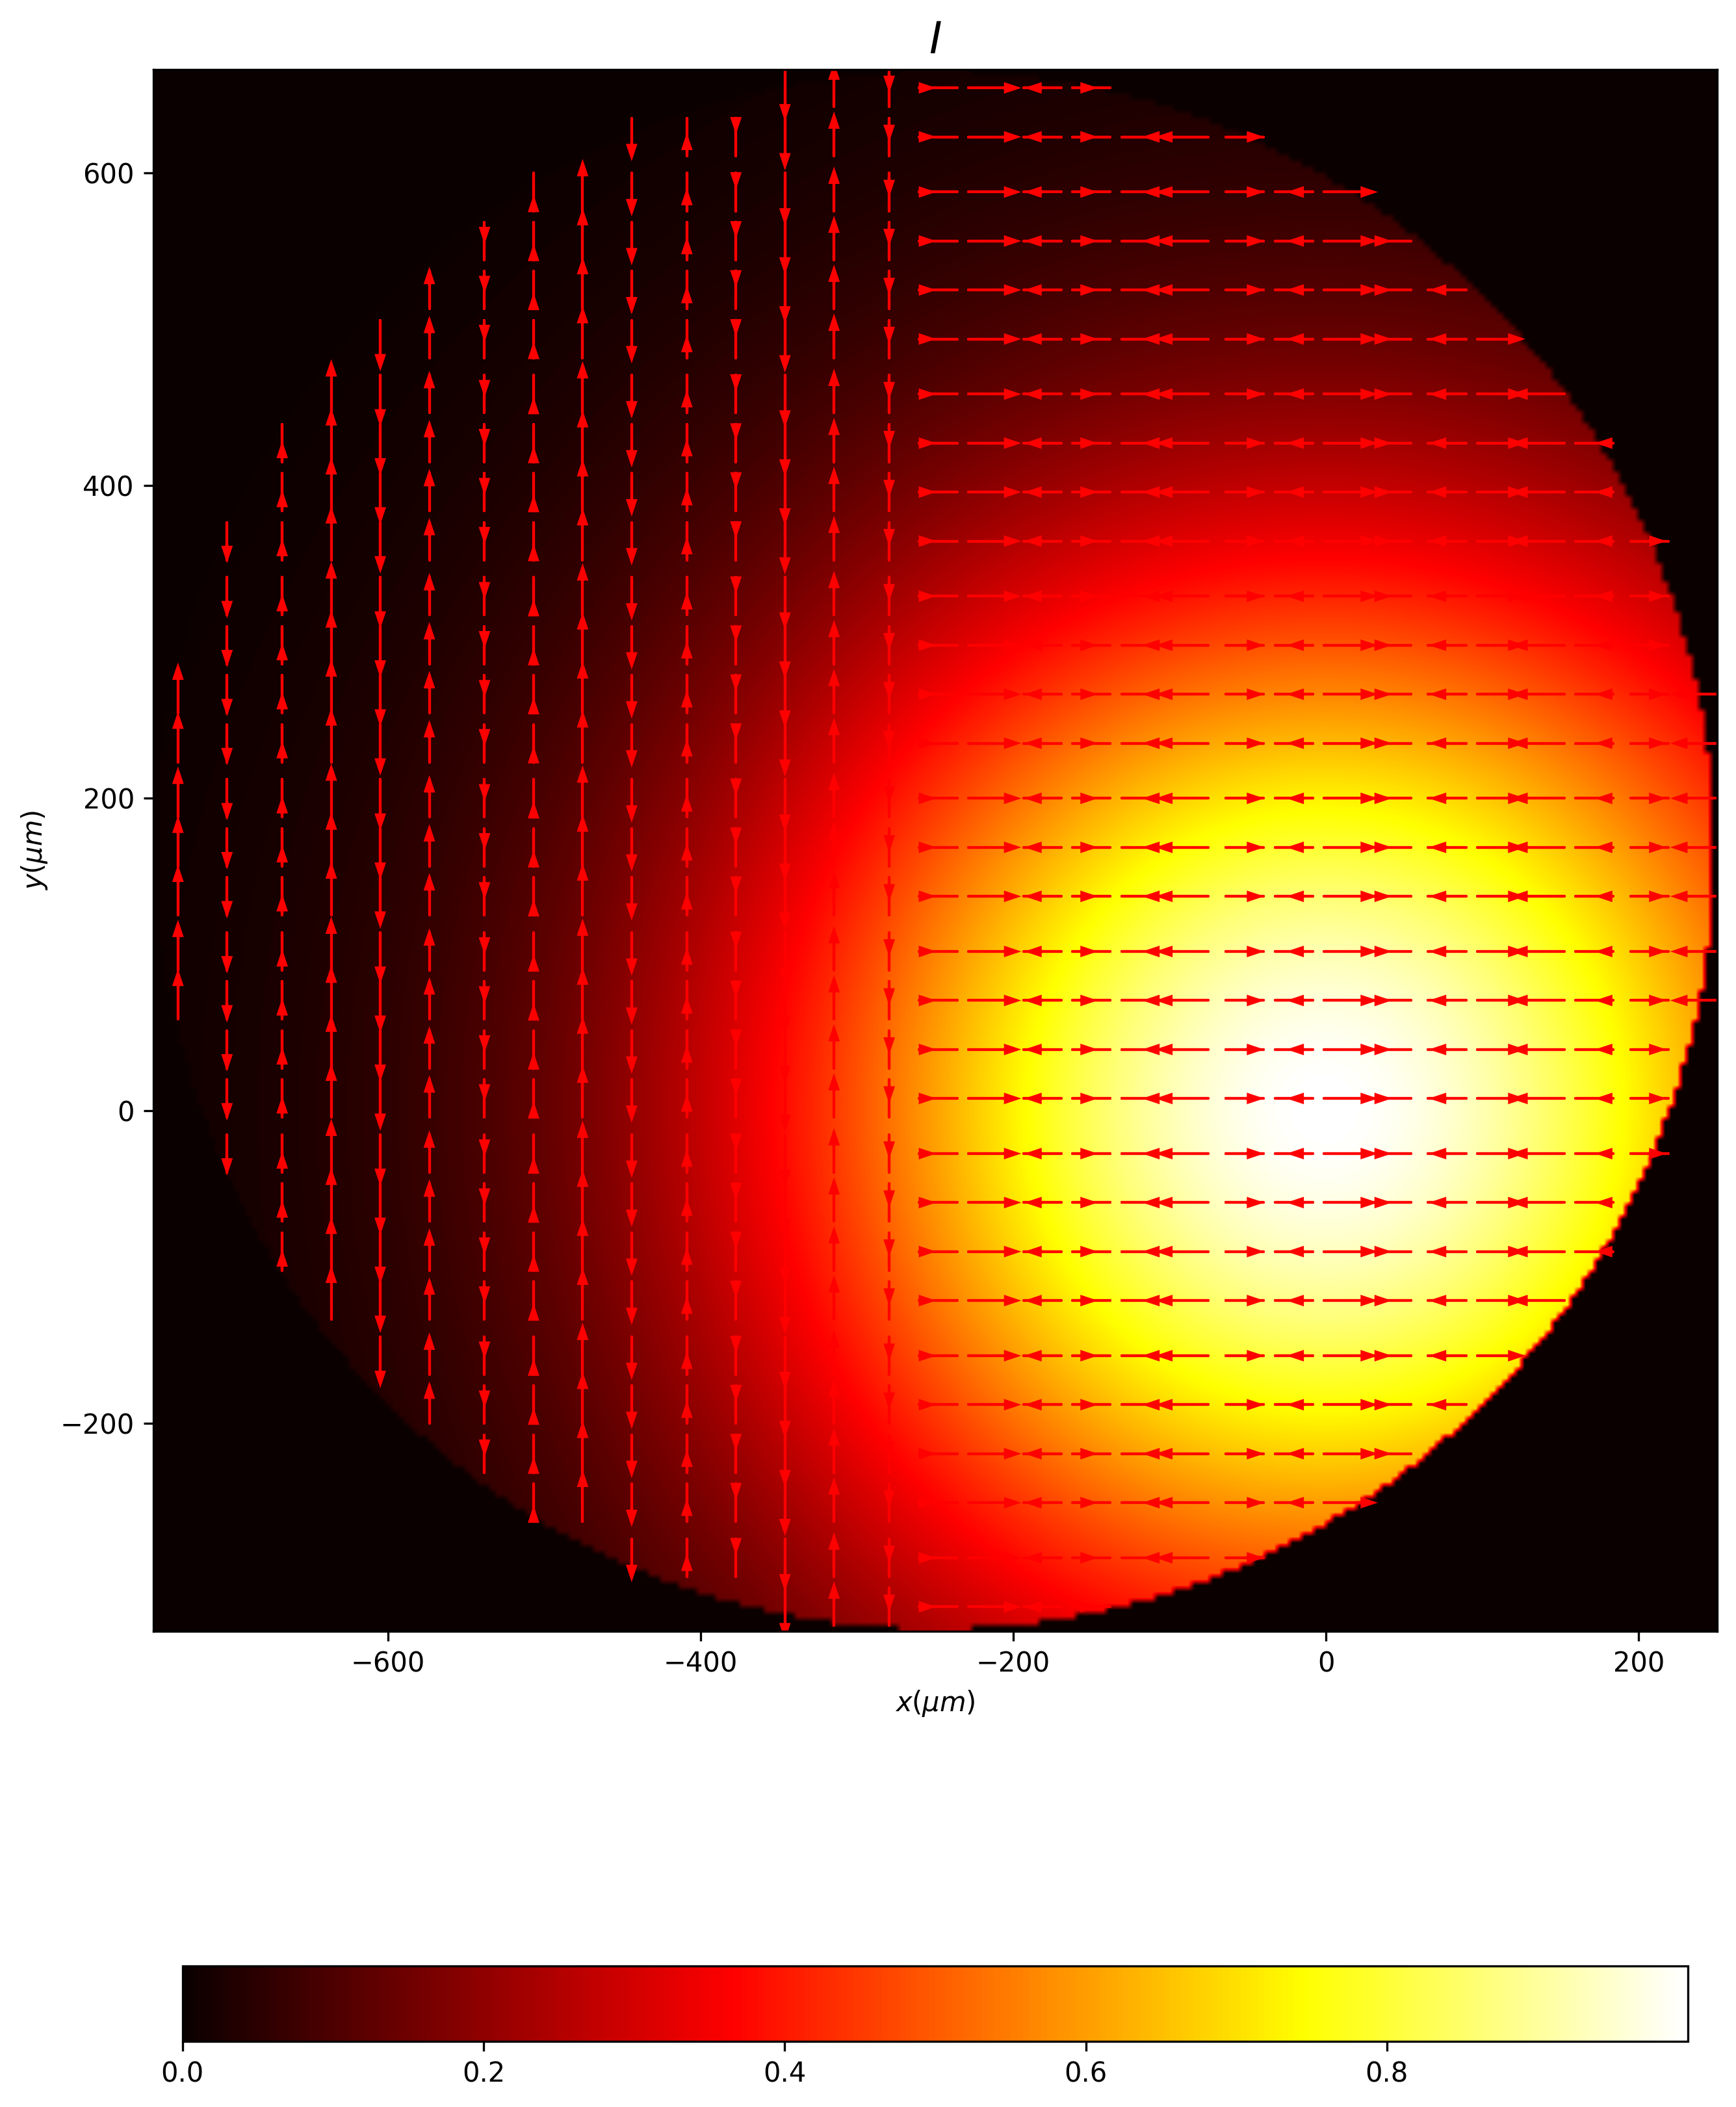

In [15]:
EM3.__draw_ellipses__(num_ellipses=(31,31), color_line='r', amplification=0.75);

In [16]:
EM4=EM3.RS(z=15*mm)

reduce_matrix_size: size ini = (256, 256), size_final = (256, 256)


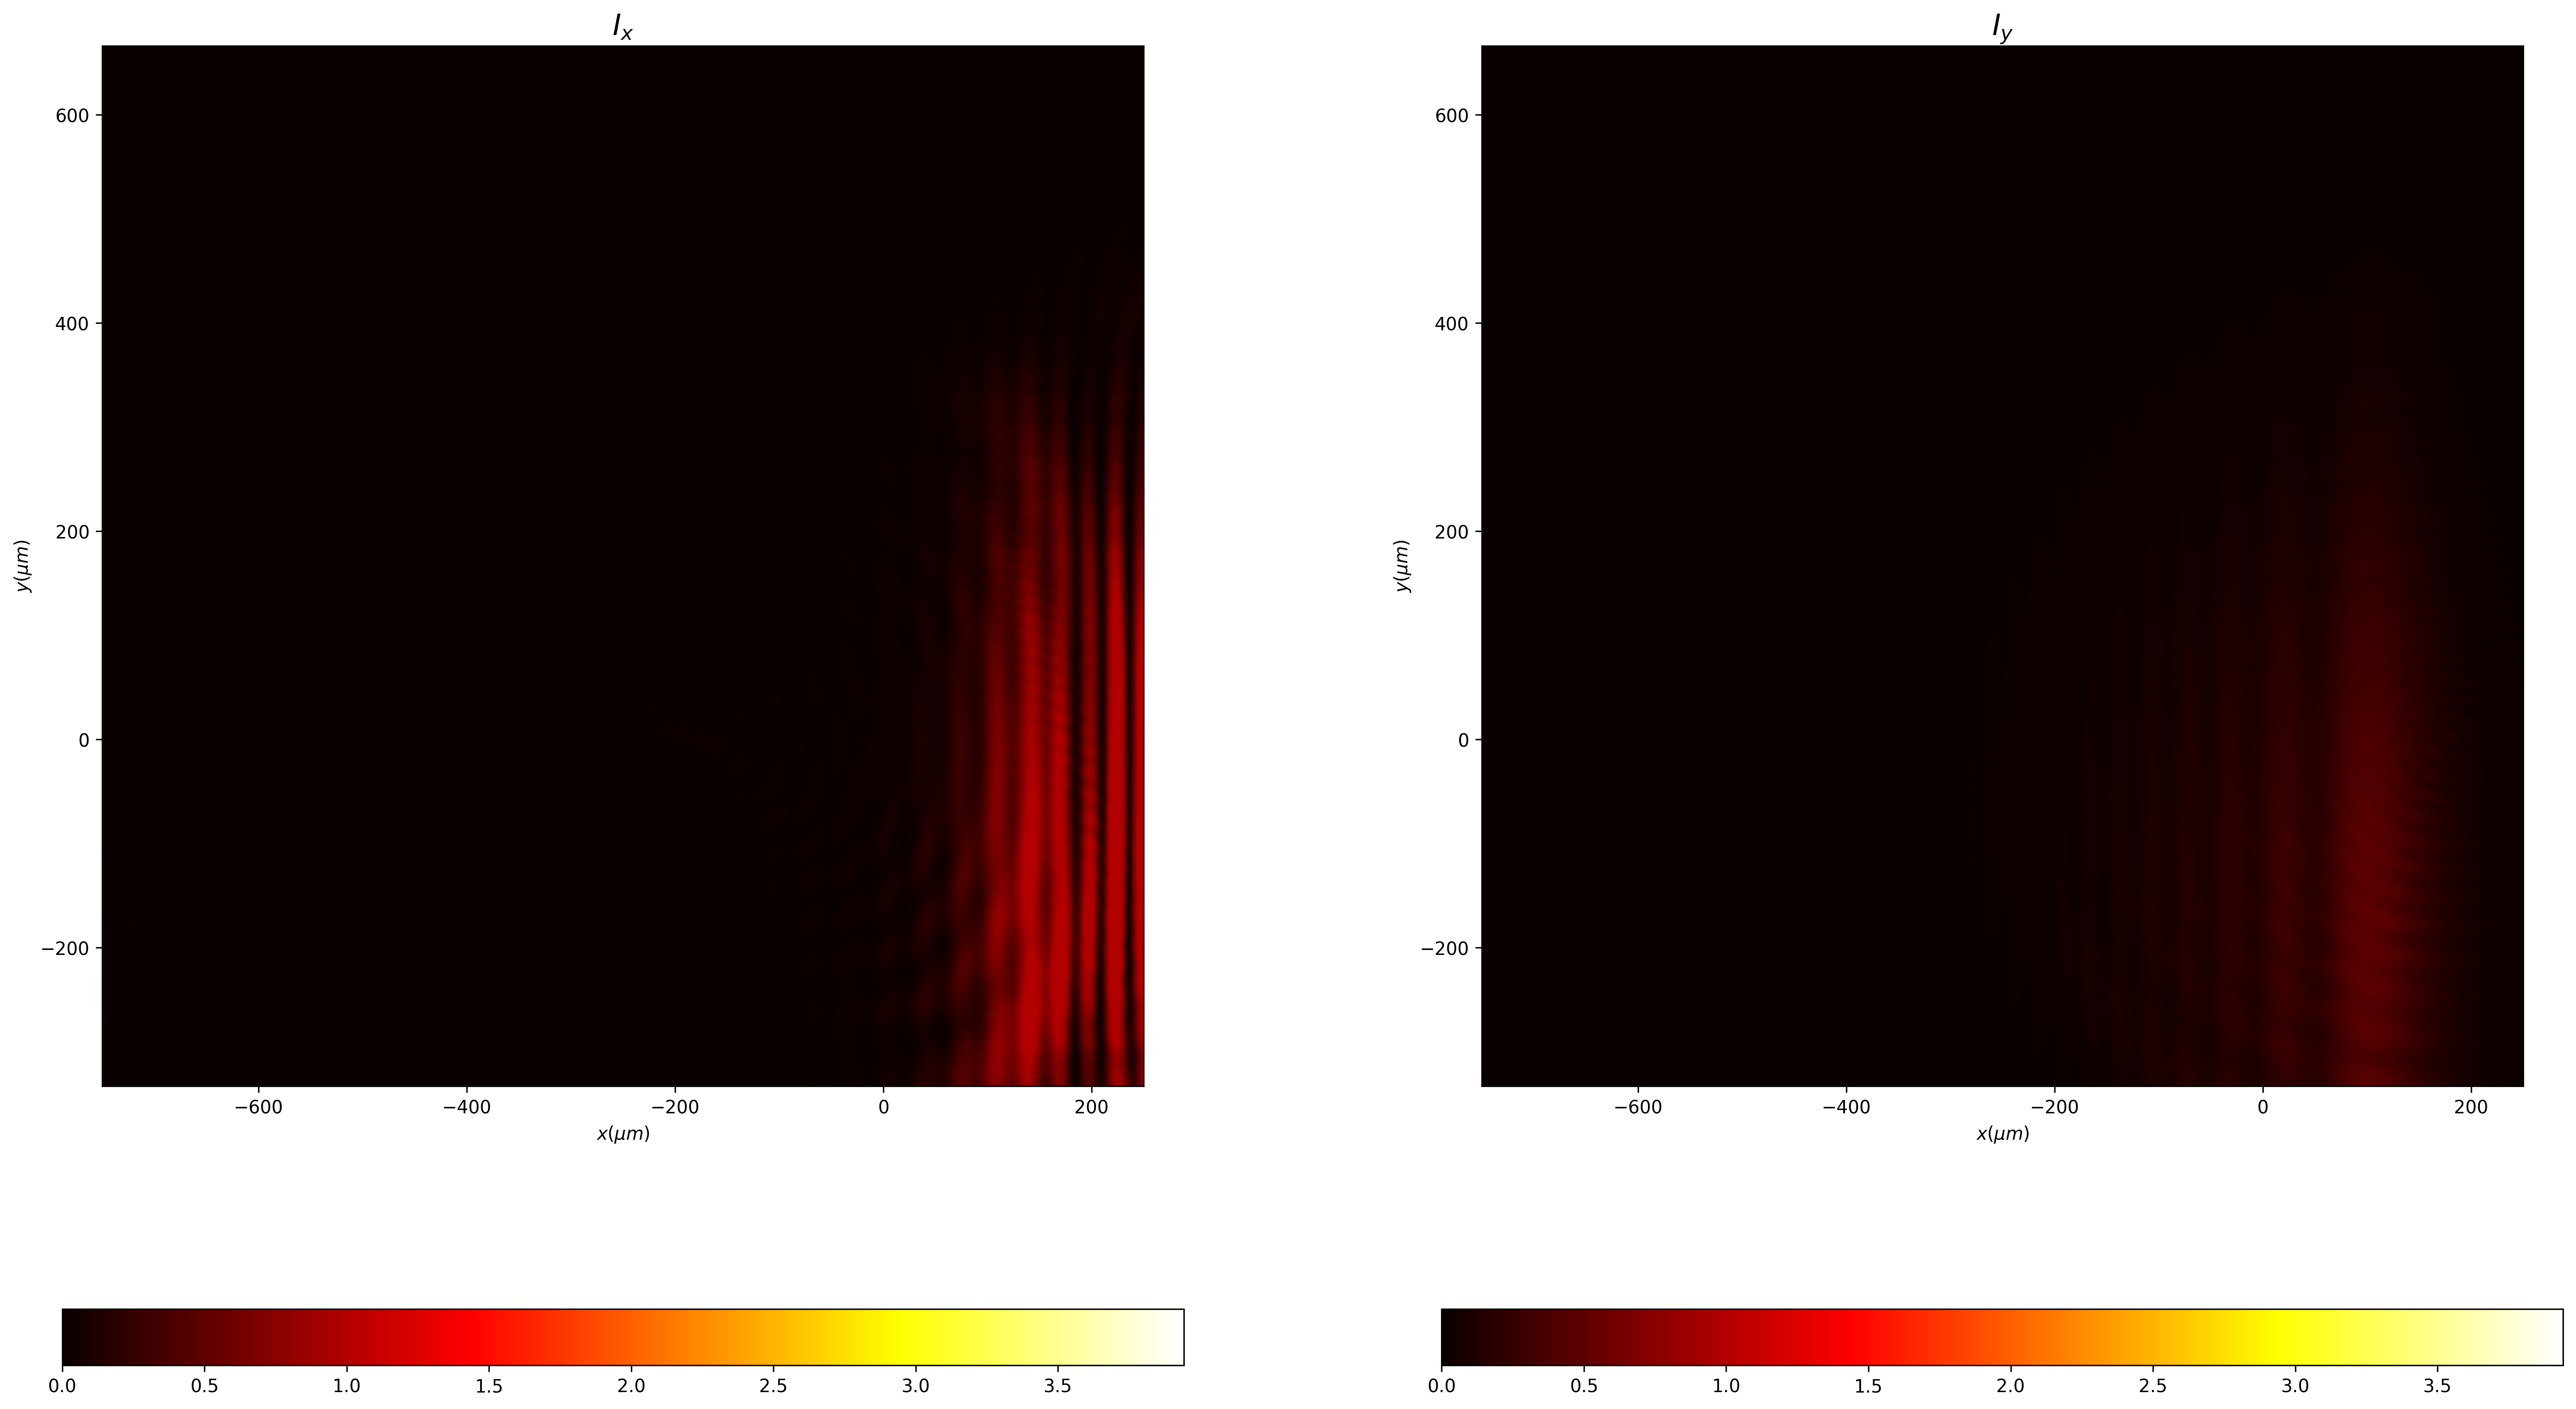

In [17]:
EM4.draw('intensities', logarithm=True);

51 51


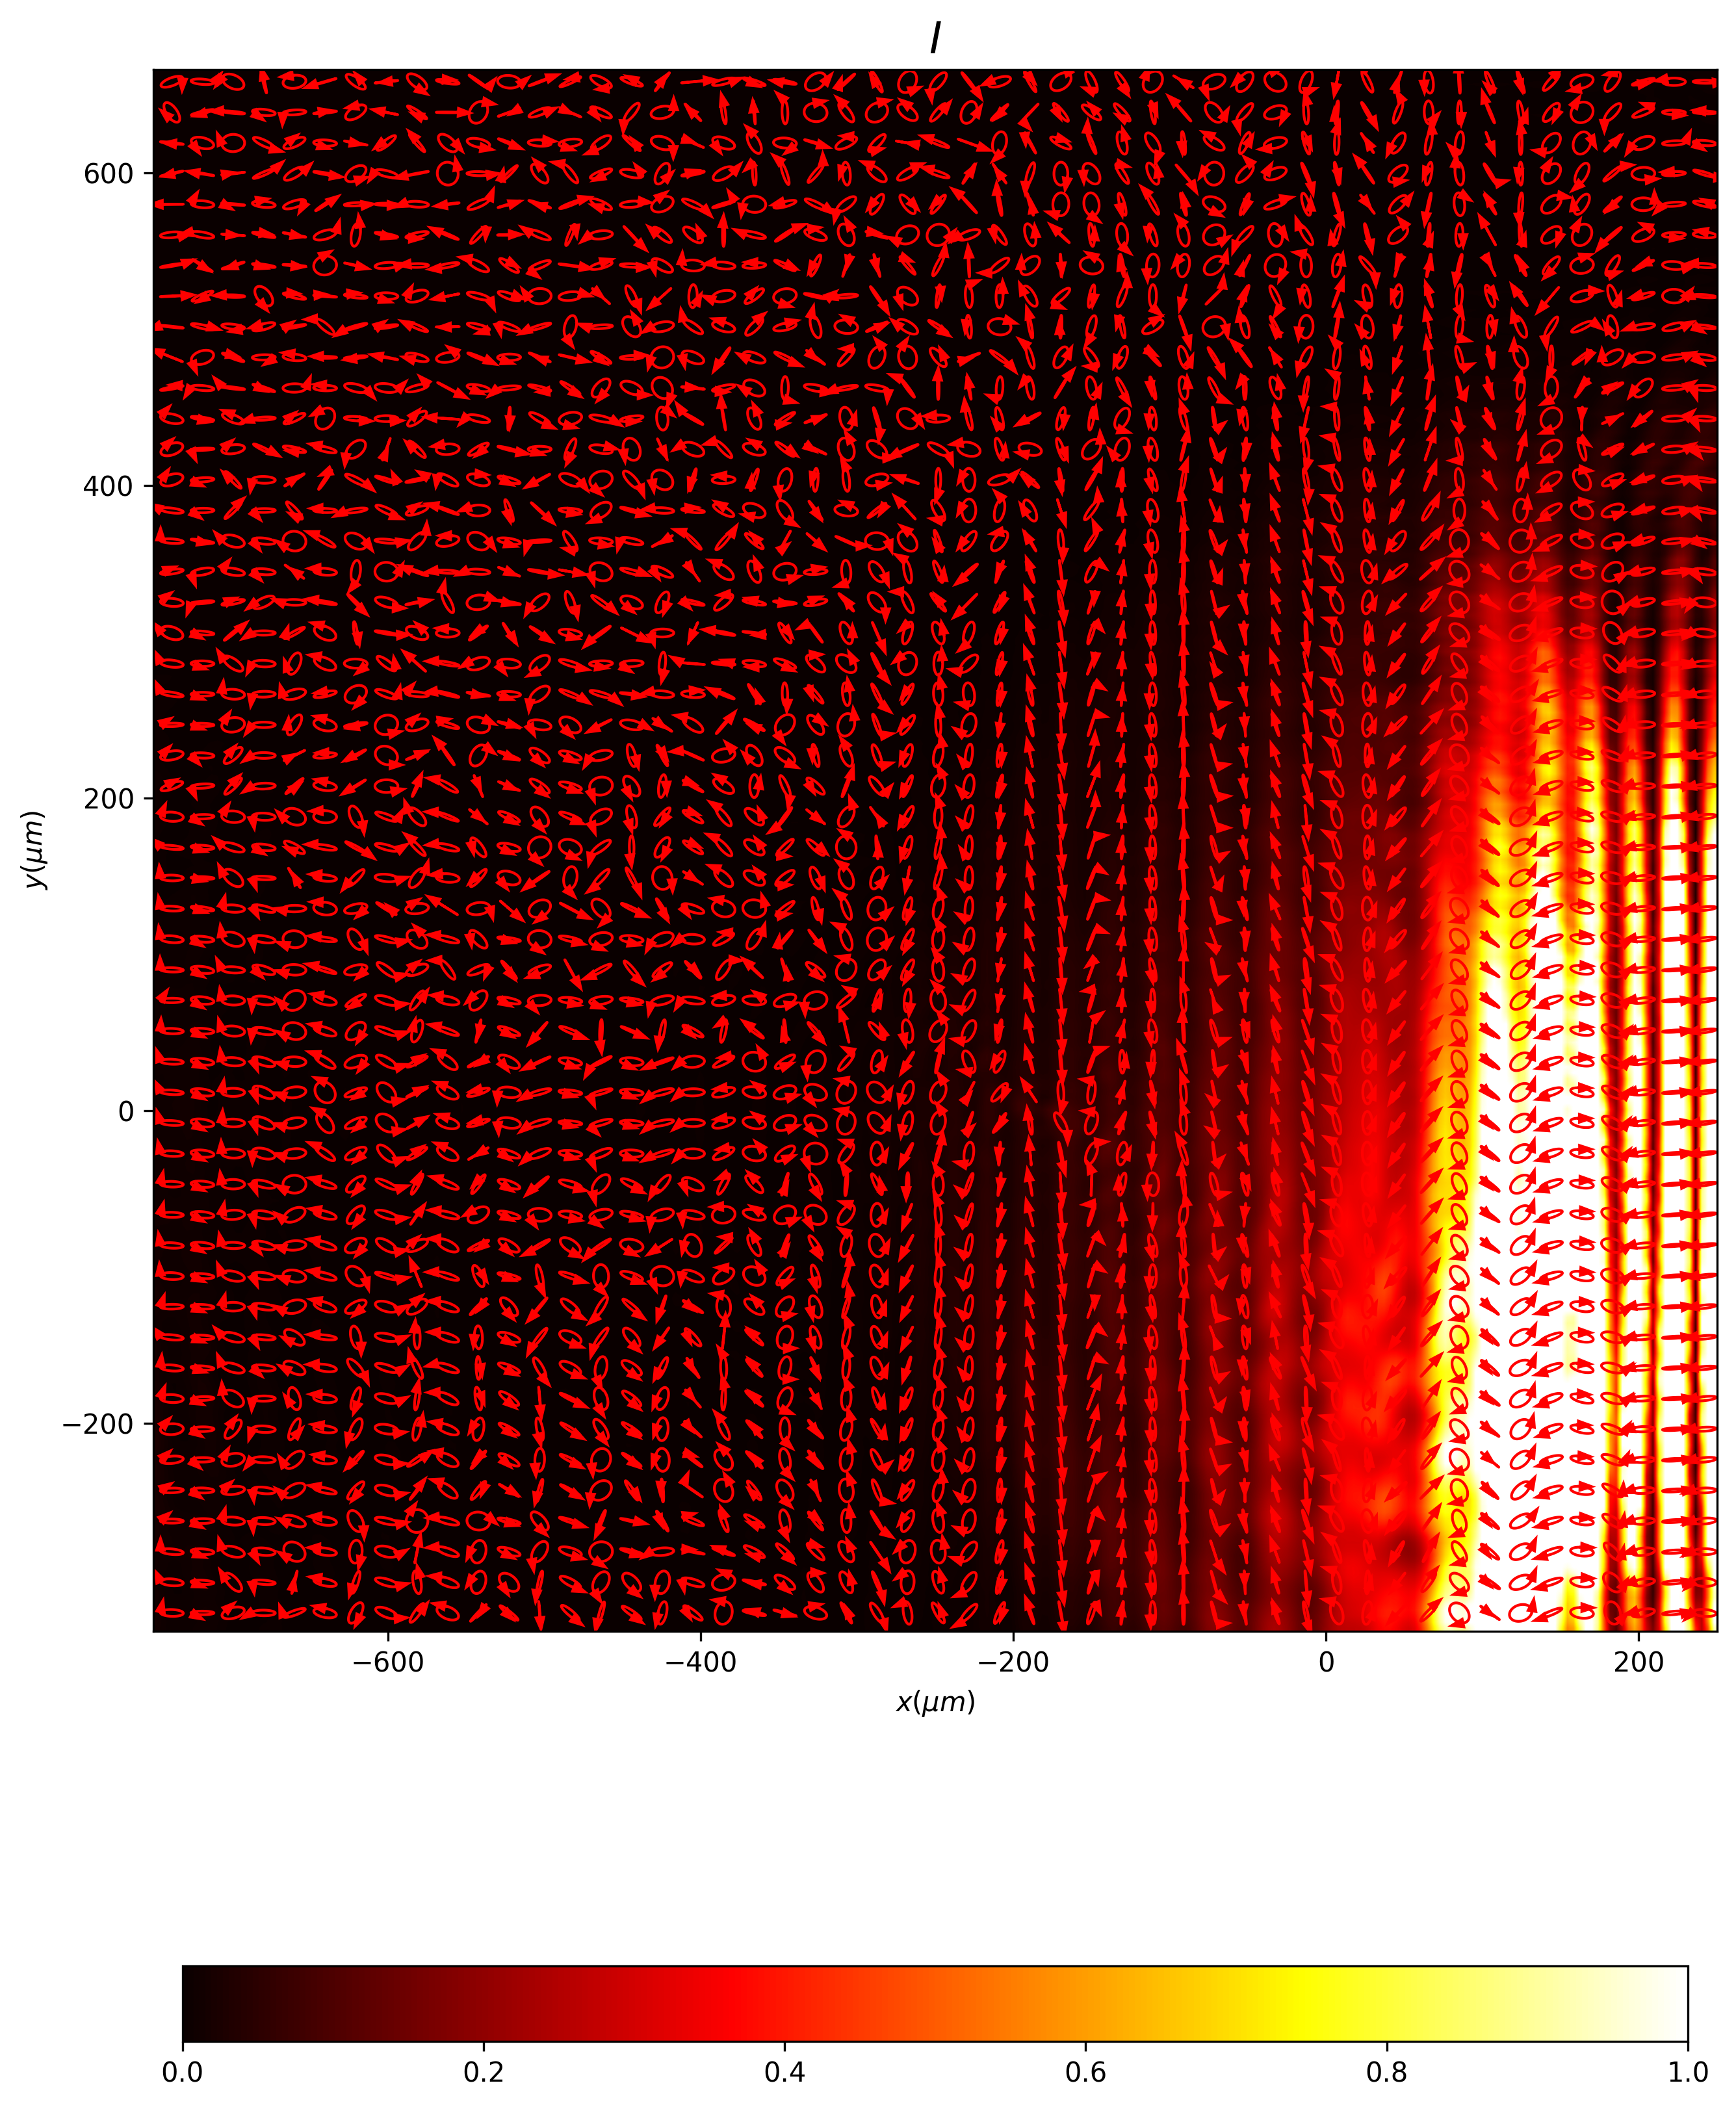

In [18]:
EM4.__draw_ellipses__(num_ellipses=(51,51), color_line='r', amplification=0.75);